In [1]:
using Plots
using Colors

In [58]:
N = 28
L = N*N
init_random = rand(N, N)
lattice_n = zeros(N, N)
q = 100

100

In [59]:
for j in 0:q-1
    lattice_n[j*(1/q) .< init_random .< (j+1)*(1/q) ] .= j*2*pi/q
end

In [60]:
function reverse(m)    
    
    z = zeros(N, N)
    
    if (N%2 == 0) #Means that N is even
        a = N/2 + 0.5 
        print(a)
        for j in 1:N 
            z[N,j] = m[1,j]
            z[1,j] = m[N,j]
            for i in 1:(N-a-0.5)
                b1 = trunc(Int, a - (2*i - 1)/2)
                b2 = trunc(Int, a + (2*i - 1)/2)
                z[b1,j] = m[b2,j]
                z[b2,j] = m[b1,j]
            end
        end
    end
    
    if (N%2 == 1) #Means that N is even
        a = trunc(Int, N/2 + 0.5)
        print(a)
        for j in 1:N 
            z[N,j] = m[1,j]
            z[a,j] = m[a,j]
            z[1,j] = m[N,j]
            for i in 1:(N-a-1)
                z[a-i,j] = m[a+i,j]
                z[a+i,j] = m[a-i,j]
            end
        end
    end
    z
end

reverse (generic function with 1 method)

14.5

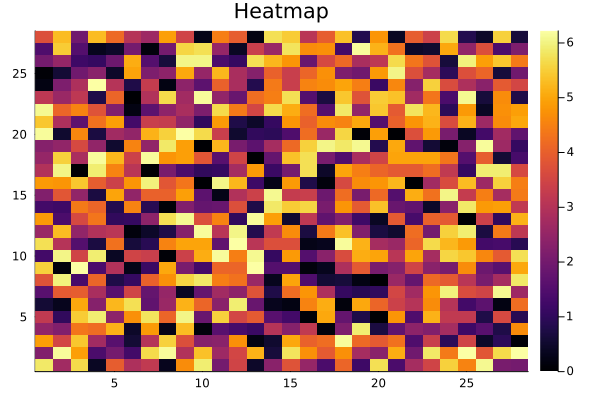

In [61]:
x = 1:1:N
y = 1:1:N
heatmap(x,y, reverse(lattice_n), colorscale="Gray", title="Heatmap")

In [62]:
function total_energy(s)
    m, n = size(s)
    #println(m)
    #println(n)
    E = 0.0
    @inbounds begin
        for j in 1:n
            for i in 1:m-1
                E -= cos(s[i,j] - s[i+1,j]) 
            end
        end
        
        for j in 1:n
            E -= cos(s[m,j] - s[1,j])
        end
        
        for j in 1:n-1
            for i in 1:m
                E -= cos(s[i,j] - s[i,j+1])
            end
        end
        
        for i in 1:m
            E -= cos(s[i,m] - s[i,1])
        end
    end
    E
end

total_energy (generic function with 1 method)

In [63]:
total_energy(lattice_n)

-4.199612637382781

In [64]:
function metropolis(spin_arr, steps, BJ, energy)
    
    N = size(spin_arr, 1)
    spin_arr = copy(spin_arr)
    net_spin = zeros(steps)
    net_energy = zeros(steps)
    ms = Float64[]
    anim = nothing
    #anim = @animate 
    for t in 0:steps - 1

        x = rand(1:N)
        y = rand(1:N)

        spin_i = spin_arr[x, y]  # Initial spin

        g = rand()

        spin_f = 0 
        # Propose a new random spin orientation
        for j in 0:q-1
            if g > j*(1/q) && g < (j+1)*(1/q)
                spin_f = j*2*pi/q
                #println("The spin_f is:", spin_f)
            end
        end

        #Compute change in energy
        E_i = 0
        E_f = 0


        # Compute the corner points
        if x==1 && y==1
            E_i += -cos(spin_i - spin_arr[1,2]) - cos(spin_i - spin_arr[2,1])
            E_f += -cos(spin_f - spin_arr[1,N]) - cos(spin_f - spin_arr[N,1])
        end

        if x==1 && y==N
            E_i += -cos(spin_i - spin_arr[1,N-1]) - cos(spin_i - spin_arr[2,N])
            E_f += -cos(spin_f - spin_arr[1,1]) - cos(spin_f - spin_arr[N,N])
        end

        if x==N && y==1
            E_i += -cos(spin_i - spin_arr[1,1]) - cos(spin_i - spin_arr[N,N])
            E_f += -cos(spin_f - spin_arr[N,2]) - cos(spin_f - spin_arr[N-1,1])
        end

        if x==N && y==N
            E_i += -cos(spin_i - spin_arr[N,1]) - cos(spin_i - spin_arr[N,N-1])
            E_f += -cos(spin_f - spin_arr[1,N]) - cos(spin_f - spin_arr[N-1,N])
        end

        # Compute points at the boundaries        
        if (x==1 && y>1) && (x==1 && y<N)
            E_i += -cos(spin_i - spin_arr[x,y-1]) - cos(spin_i - spin_arr[x,y+1])
            E_f += -cos(spin_f - spin_arr[N,y]) - cos(spin_f - spin_arr[x+1,y])
        end

        if (x==N && y>1) && (x==N && y<N)
            E_i += -cos(spin_i - spin_arr[x,y-1]) - cos(spin_i - spin_arr[x,y+1])
            E_f += -cos(spin_f - spin_arr[1,y]) - cos(spin_f - spin_arr[x-1,y])
        end

        if (y==1 && x>1) && (y==1 && x<N) 
            E_i += -cos(spin_i - spin_arr[y,x+1]) - cos(spin_i - spin_arr[y,x-1])
            E_f += -cos(spin_f - spin_arr[x,N]) - cos(spin_f - spin_arr[x,y+1])
        end

        if (y==N && x>1) && (y==N && x<N)
            E_i += -cos(spin_i - spin_arr[x+1,y]) - cos(spin_i - spin_arr[x-1,y])
            E_f += -cos(spin_f - spin_arr[x,y-1]) - cos(spin_f - spin_arr[x,1])
        end

        #Rest of the points
        if (x>1 && x<N) && (y>1 && y<N)
            E_i +=  -cos(spin_i - spin_arr[x-1,y]) - cos(spin_i - spin_arr[x+1,y])            
            E_f +=  -cos(spin_f - spin_arr[x-1,y]) - cos(spin_f - spin_arr[x+1,y]) 

            E_i += -cos(spin_i - spin_arr[x,y-1]) - cos(spin_i - spin_arr[x,(y+1)])
            E_f += -cos(spin_f - spin_arr[x,y-1]) - cos(spin_f - spin_arr[x,(y+1)])
        end

        dE = E_f - E_i
        if dE > 0 && rand() < exp(-BJ * dE)
            spin_arr[x, y] = spin_f
            energy += dE
        elseif dE ≤ 0
            spin_arr[x, y] = spin_f
            energy += dE
        end

        s1 = sum(cos.(spin_arr))
        s2 = sum(sin.(spin_arr))

        m = sqrt(s1*s1 + s2*s2)
        
        if t % 10 == 0
            push!(ms, m)
        end

        net_spin[t + 1] = m
        net_energy[t + 1] = energy

        #if t % 500 == 0
        #    x = 1:1:N
        #    y = 1:1:N
        #    z = spin_arr
        #    heatmap(x, y, reverse(z))
        #end
    end # every 500
        
    return net_spin, net_energy, spin_arr, anim, ms
end

metropolis (generic function with 1 method)

In [65]:
betaJ = 0.9
time_steps = 100000000 # number of configurations will be this number divided by 10
net_spin, net_energy, spin_arr, anim, ms = @time metropolis(lattice_n, time_steps, betaJ, total_energy(lattice_n))
length(ms)

3020.609992 seconds (57.98 G allocations: 2.153 TiB, 4.03% gc time, 0.01% compilation time)


10000000

In [66]:
spins = ms/L
outfile = "N784_bJ09.npy"
open(outfile, "w") do f
  for i in spins
    println(f, i)
  end
end 